https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
    
https://github.com/CSSEGISandData/COVID-19

In [2]:
#confirmed cases, deaths and recoveries
import pandas as pd
import matplotlib.pyplot as plt

confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

print(confirmed.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/13/21  5/14/21  5/15/21  \
0        0        0        0        0  ...    63045    63355    63412   
1        0        0        0        0  ...   131890   131939   131978   
2        0        0        0        0  ...   124889   125059   125194   
3        0        0        0        0  ...    13470    13510    13510   
4        0        0        0        0  ...    29695    30030    30354   

   5/16/21  5/17/21  5/18/21  5/19/21  5/20/21  5/21/21  5/22/21  
0    63484    63598    63819    64122    64575   

In [3]:
confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered = recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

confirmed = confirmed.T
deaths = deaths.T
recovered = recovered.T

In [4]:
new_cases = confirmed.copy()

for day in range(1, len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]

growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100

active_cases = confirmed.copy()

for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recovered.iloc[day]

overall_growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day-1]) / active_cases.iloc[day - 1]) * 100

death_rate = confirmed.copy()

for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

In [5]:
hospitalization_rate_estimate = 0.05

hospitalization_needed = confirmed.copy()

for day in range(0, len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate

In [6]:
estimated_death_rate = 0.03
print(deaths['Italy'].tail()[4] / estimated_death_rate)

4171766.666666667


No handles with labels found to put in legend.


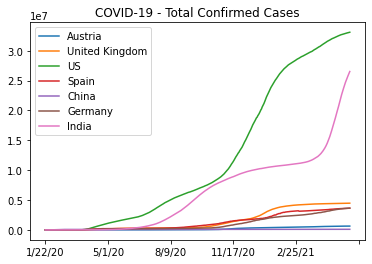

In [30]:
#visualization 
ax = plt.subplot()

ax.set_title('COVID-19 - Total Confirmed Cases')
ax.legend(loc="upper left")

countries = ['Austria', 'United Kingdom', 'US', 'Spain', 'China', 'Germany', 'India']

for country in countries:
    confirmed[country][0:].plot(label = country)

plt.legend(loc='upper left')
plt.show()

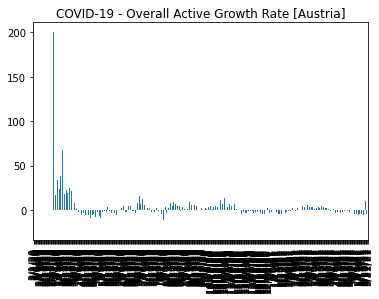

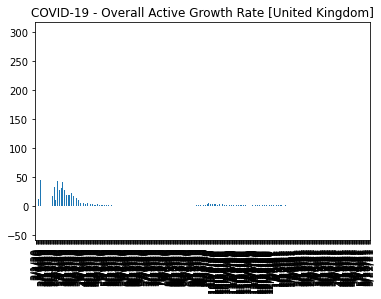

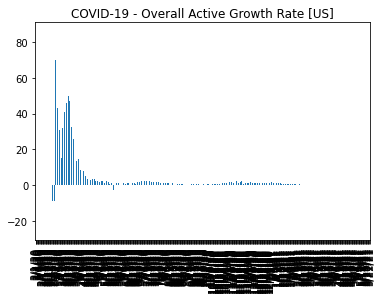

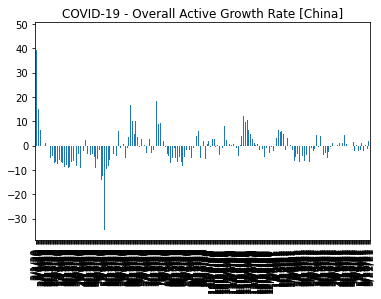

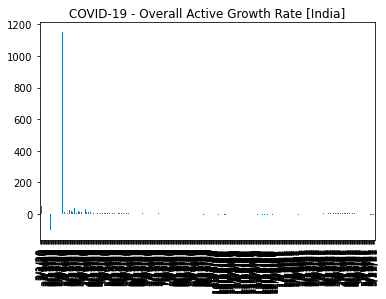

In [29]:
countries = ['Austria', 'United Kingdom', 'US', 'China','India']

for country in countries:
    ax = plt.subplot()
    ax.set_title(f'COVID-19 - Overall Active Growth Rate [{country}]')
    overall_growth_rate[country][10:].plot.bar()
    plt.show()

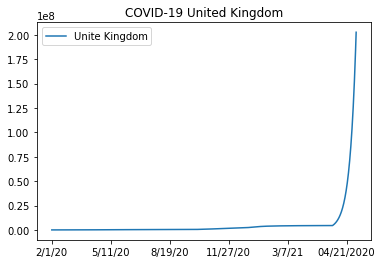

In [25]:
#Running Silmulation
simulation_growth_rate = 0.1

dates = pd.date_range(start='3/29/2020', periods=40, freq='D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%Y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index=dates))

for day in range(len(confirmed), len(confirmed)+40):
    simulated.iloc[day] = simulated.iloc[day - 1] * (simulation_growth_rate + 1)
    
ax = simulated['United Kingdom'][10:].plot(label="Unite Kingdom")
ax.set_axisbelow(True)
ax.set_title('COVID-19 United Kingdom')
ax.legend(loc="upper left")

plt.show()

https://www.neuralnine.com/analyzing-coronavirus-with-python-covid-19/